In [ ]:
%tensorflow_version 2  # This tells Colab to use TF2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2  # This tells Colab to use TF2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# Test Active Wave Breaking Classifier

Test the classifier.

The data needs to be in a folder called "test" which has sub-folders "0" and "1"

For example:

```
test
    ├───0
    ├───1
```

We will need to download a pre-trained model

```
# PROGRAM   : test_wave_breaking_classifier.py
# POURPOSE  : classify wave breaking using a convnets
# AUTHOR    : Caio Eadi Stringari
# EMAIL     : caio.stringari@gmail.com
# V1.0      : 05/05/2020 [Caio Stringari]
```

## Data Download

Load data from my google drive. You may need to copy the data over to yours to use this program.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/FEM/data/test.tar.gz" .

In [ ]:
!tar -zxf test.tar.gz

## Imports

In [ ]:
import os

import numpy as np

import tensorflow as tf

import pathlib

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

## Load the model

In [ ]:
modelpath = "/content/drive/My Drive/Colab Notebooks/FEM/InceptionResNetV2Baseline.h5"
model = tf.keras.models.load_model(modelpath)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:1030: UserWarning: keras_applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


## Keras Data Generator
Load the teset data

The augumentations steps are:
1. Rescale in the range [0, 1]

Keras generators will take care of the rest this  for us.

In [ ]:
def show_batch(image_batch, label_batch):
    fig = plt.figure(figsize=(10, 10))
    for n in range(len(image_batch)):
        ax = plt.subplot(12, 10, n + 1)
        plt.imshow(image_batch[n])
        plt.title("class : "+str(int(label_batch[n])))
        plt.axis('off')
    fig.tight_layout()

In [ ]:
# --- test data input ---
test_dir = "test/"
test_dir = pathlib.Path(test_dir)
image_count = len(list(test_dir.glob('*/*')))

class_names = np.array([item.name for item in test_dir.glob('*')])

try:
    nclasses = len(class_names)
    print("  Found image data, proceeding.\n")
    print("   - Classes are {}".format(class_names))
except Exception:
    raise IOError("Check your data!")

inp_shape = model.input_shape
img_height = inp_shape[1]  # image height for all images
img_width = inp_shape[2]  # image width for all images

  Found image data, proceeding.

   - Classes are ['1' '0']


In [ ]:
# tells the Generator when to stop
BATCH_SIZE = 120

datagen = ImageDataGenerator(rescale=1./255.)

print("\n    Fitting the teset data generator:\n")
data_gen_test = datagen.flow_from_directory(
    directory=str(test_dir), batch_size=BATCH_SIZE, shuffle=False,
    target_size=(img_height, img_width), classes=["0", "1"],
    class_mode="binary")


    Fitting the teset data generator:

Found 1200 images belonging to 2 classes.


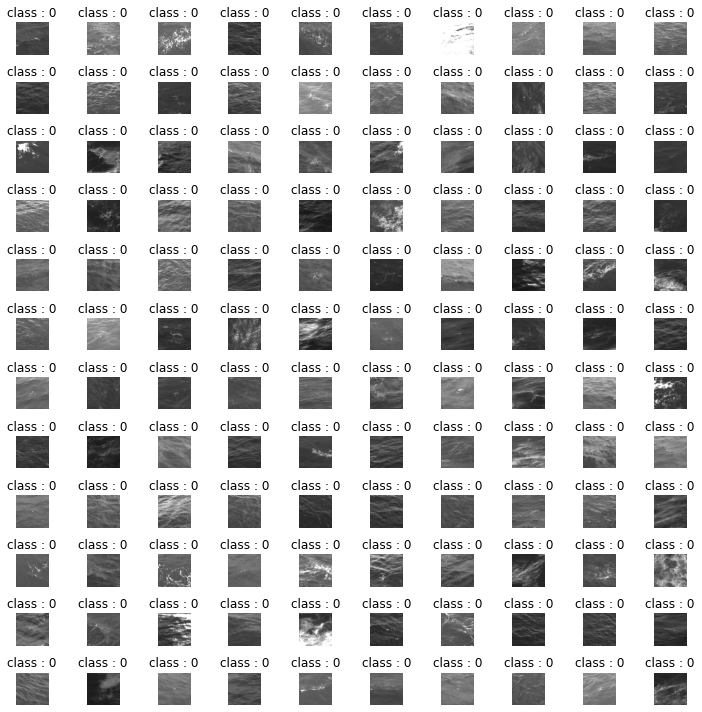

In [ ]:
image_batch, label_batch = next(data_gen_test)
show_batch(image_batch, label_batch)

## Predict new labels

In [ ]:
# predict on the test data
ytrue = []
yhat = []
for step in range(data_gen_test.n // BATCH_SIZE):
    print("step {} of {}".format(step+1, data_gen_test.n // BATCH_SIZE), end="\r")
    X, y = data_gen_test.next()
    yh = model.predict(X)
    for i, j in zip(np.squeeze(y), np.squeeze(yh)):
        ytrue.append(i)
        yhat.append(j)


In [ ]:
# predicted labels
TRX = 0.5
yhat = np.squeeze(yhat)
ypred = np.zeros(yhat.shape)
ypred[yhat > TRX] = 1

In [ ]:
print(classification_report(ytrue, ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94      1025
         1.0       0.87      0.23      0.36       175

    accuracy                           0.88      1200
   macro avg       0.88      0.61      0.65      1200
weighted avg       0.88      0.88      0.85      1200

